In [187]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import scipy.optimize as op

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [188]:
data = loadmat('data/ex5data1.mat')

x = data['X']
x = np.c_[np.ones(x.shape[0]), x]
y = data['y']
xtest = data['Xtest']
xtest = np.c_[np.ones(xtest.shape[0]), xtest]
ytest = data['ytest']
xval = data['Xval']
xval = np.c_[np.ones(xval.shape[0]), xval]
yval = data['yval']

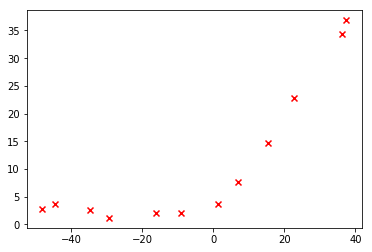

In [189]:
# 1.1 Plot Figure 1
plt.scatter(x[:,1:], y, c='r', marker='x')

In [190]:
# 1.2 Regularized linear regression cost function

def costFunc(theta, x, y, lamda):
    m = x.shape[0]
    h = x.dot(theta.reshape(-1,1))
    j = 1/(2*m)*np.sum( np.square(h-y) ) + lamda/(2*m)*np.sum(np.square(theta[1:]))
    return j


theta = np.ones((x.shape[1],1))
print(costFunc( theta, x, y, 0))
    

def grad(theta, x, y, lamda):
    m = x.shape[0]
    h = x.dot(theta.reshape(-1,1))
    g = 1/m * x.T.dot(h-y) + (lamda/m*theta.reshape(-1,1))
    return g.flatten()


grad(theta, x, y, 0)


303.9515255535976


array([-15.30301567, 598.16741084])

In [191]:
# theta0, theta1 구해서 linear 의 계수로 사용하였다.
def trainLinear(x, y, lamda ):
    # theta = np.ones((x.shape[1],1))
    theta = np.zeros((x.shape[1],1))
    res = op.minimize(costFunc, theta, args=(x, y, lamda), method=None, jac=grad, options={'maxiter':5000})
    return res.x


fit = trainLinear(x, y, 0)
print(fit)

[13.08790351  0.36777923]


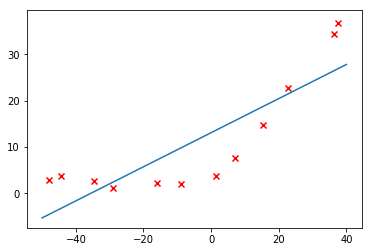

In [192]:
plt.plot(np.linspace(-50,40), (fit[0]+ (fit[1]*np.linspace(-50,40))))
plt.scatter(x[:,1:], y, c='r', marker='x')

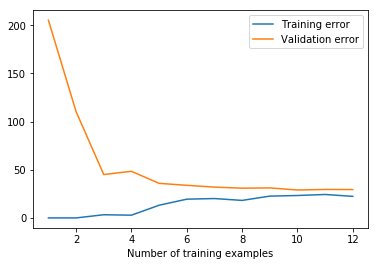

In [193]:
def learningCurve(x, y, xval, yval, lamda):
    m = x.shape[0]
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in range(m):
        # i번째 data 까지 학습시켜 theta 를 구해서, res 라고 한다.
        res = trainLinear(x[:i+1], y[:i+1], lamda)
        # i번째 
        # i번째 data 학습시킨 theta 가지고 cost func 계산한다.
        error_train[i] = costFunc(res, x[:i+1], y[:i+1], lamda)
        error_val[i] = costFunc(res, xval, yval, lamda)
    
    return error_train, error_val



error_train, error_val = learningCurve(x,y,xval,yval,0)
plt.plot(np.arange(1,13), error_train, label='Training error')
plt.plot(np.arange(1,13), error_val, label='Validation error')
plt.xlabel('Number of training examples')
plt.legend()

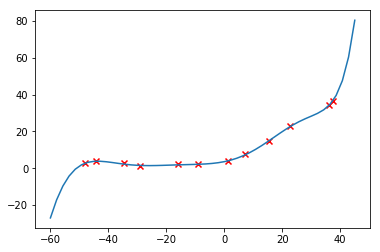

In [194]:
poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x[:,1].reshape(-1,1))
linear = LinearRegression()
linear.normalize=True 
linear.fit(x_poly,y)

plot_x = np.linspace(-60,45)
plot_y = linear.intercept_+ np.sum(linear.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plt.plot(plot_x, plot_y)
plt.scatter(x[:,1:], y, c='r', marker='x')


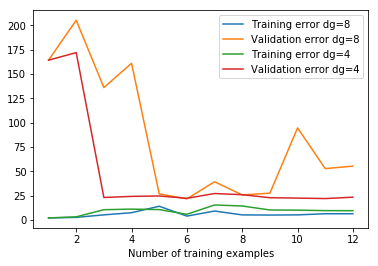

In [195]:
def learningCurvePoly(x, y, xval, yval, lamda, degree=8):
    m = x.shape[0]
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x[:,1].reshape(-1,1))
    linear = LinearRegression()
    linear.normalize=True
    
    xval_poly = poly.fit_transform(xval[:,1].reshape(-1,1))
    
    for i in range(m):
        # i번째 data 까지 학습시켜 theta 를 구해서, res 라고 한다.        
        linear.fit(x_poly[:i+1],y[:i+1])
        # linear.coef_ 는  theta 와 같다???
        res = linear.coef_
        # i번째 data 학습시킨 theta 가지고 cost func 계산한다.
        error_train[i] = costFunc(res, x_poly[:i+1], y[:i+1], lamda)
        error_val[i] = costFunc(res, xval_poly, yval, lamda)
    
    return error_train, error_val


error_train, error_val = learningCurvePoly(x,y,xval,yval,0,8)
plt.plot(np.arange(1,13), error_train, label='Training error dg=8')
plt.plot(np.arange(1,13), error_val, label='Validation error dg=8')

error_train1, error_val1 = learningCurvePoly(x,y,xval,yval,0,4)
plt.plot(np.arange(1,13), error_train1, label='Training error dg=4')
plt.plot(np.arange(1,13), error_val1, label='Validation error dg=4')
plt.xlabel('Number of training examples')
plt.legend()